In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cmcrameri.cm as cmc
import cartopy.crs as ccrs
from tqdm import tqdm
import itertools

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_phase1 = Path("data/yearly_average_phase1").glob("*.nc")
file_phase2 = Path("data/yearly_average_phase21").glob("*.nc")

data_phase1 = [xr.open_dataset(file) for file in file_phase1]
data_phase2 = [xr.open_dataset(file) for file in file_phase2]

In [3]:
data_types = ["sea_level_anomaly_raw", "sea_level_anomaly", "sea_level_anomaly_filtered"]
months = ["June", "July", "August"]

In [61]:
JJA_average1, JJA_average2 = [], []
for data_type in data_types:
    averages1 = []
    for data1 in data_phase1:
        yearly = []
        for idx in range(len(data1.time)):
            yearly.append(data1[data_type][idx].values)
        averages1.append(yearly)
    JJA_average1.append(np.nanmean(averages1, axis=0))

    averages2 = []
    for data2 in data_phase2:
        yearly = []
        for idx in range(len(data2.time)):
            yearly.append(data2[data_type][idx].values)
        averages2.append(yearly)
    JJA_average2.append(np.nanmean(averages2, axis=0))


In [53]:
years1 = [year[:4] for year in data_phase1[0].time.values]
years2 = [year[:4] for year in data_phase2[0].time.values]

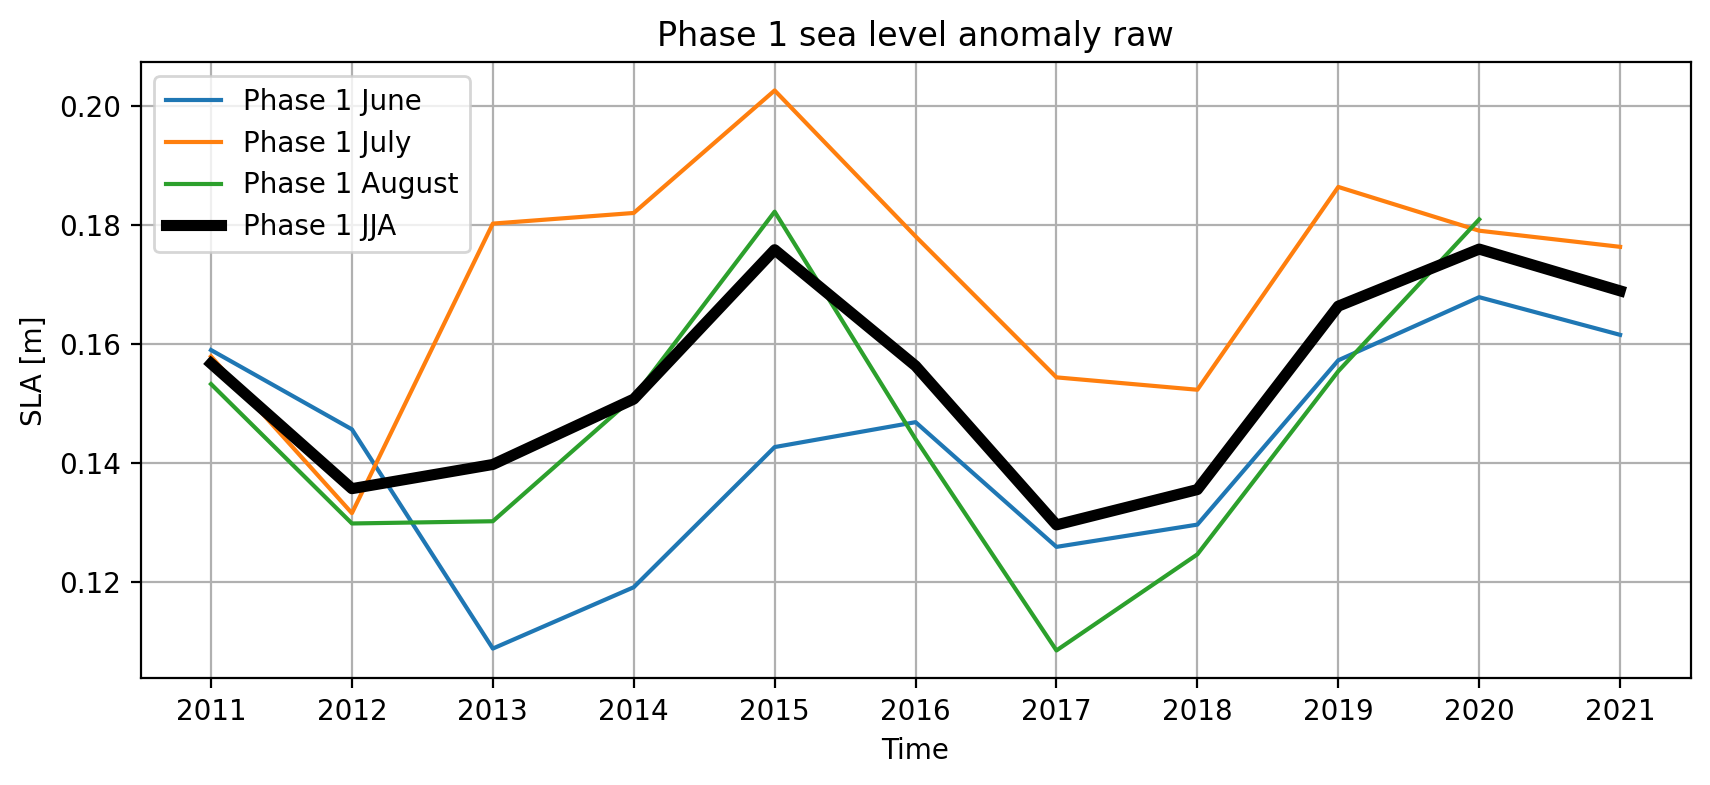

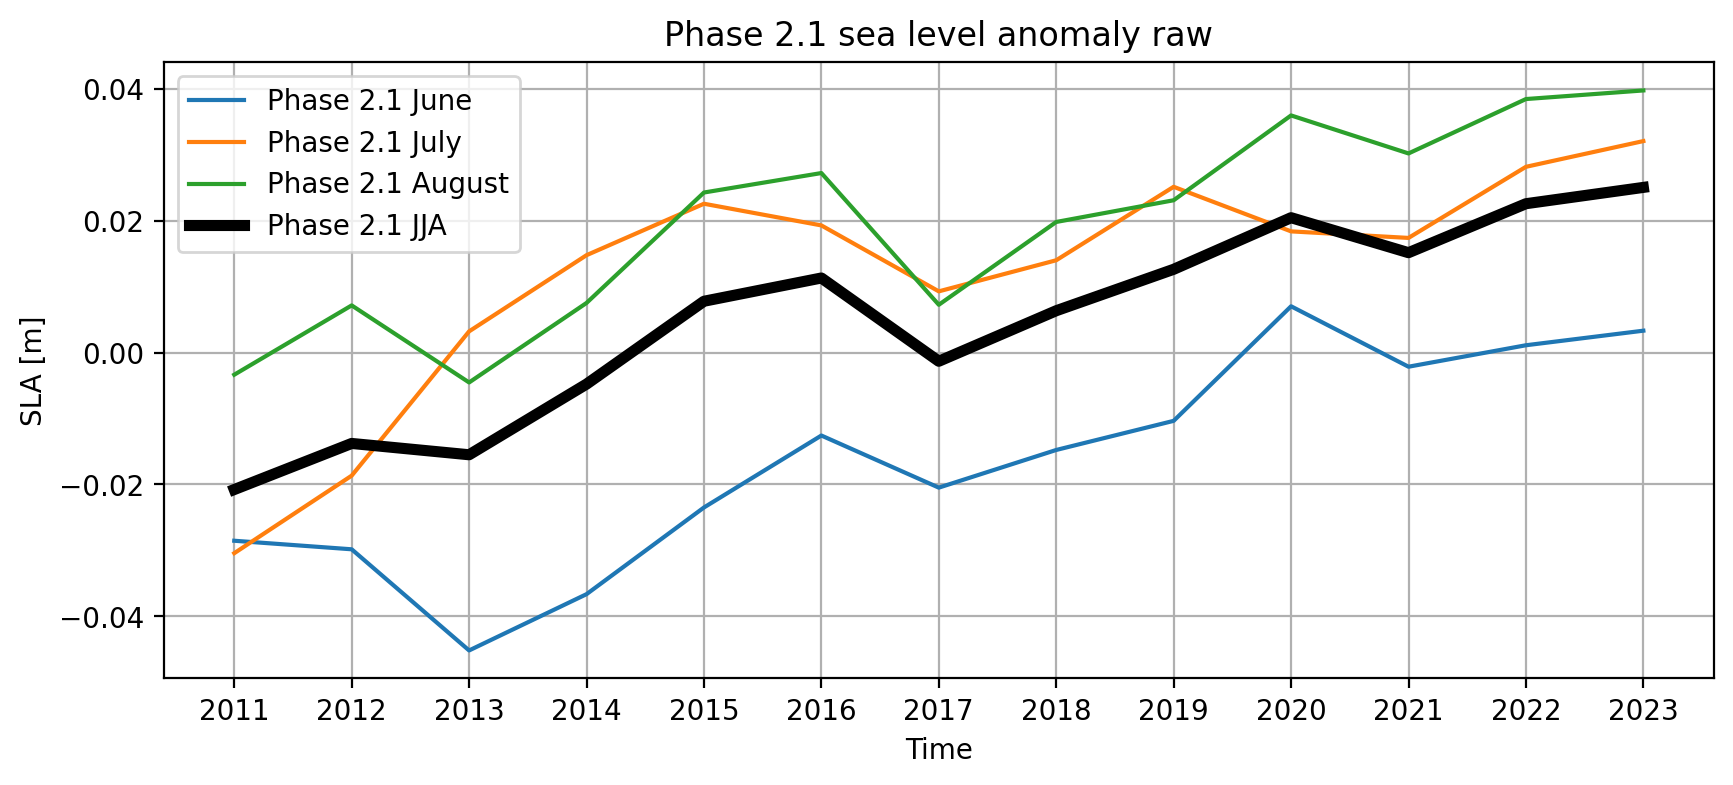

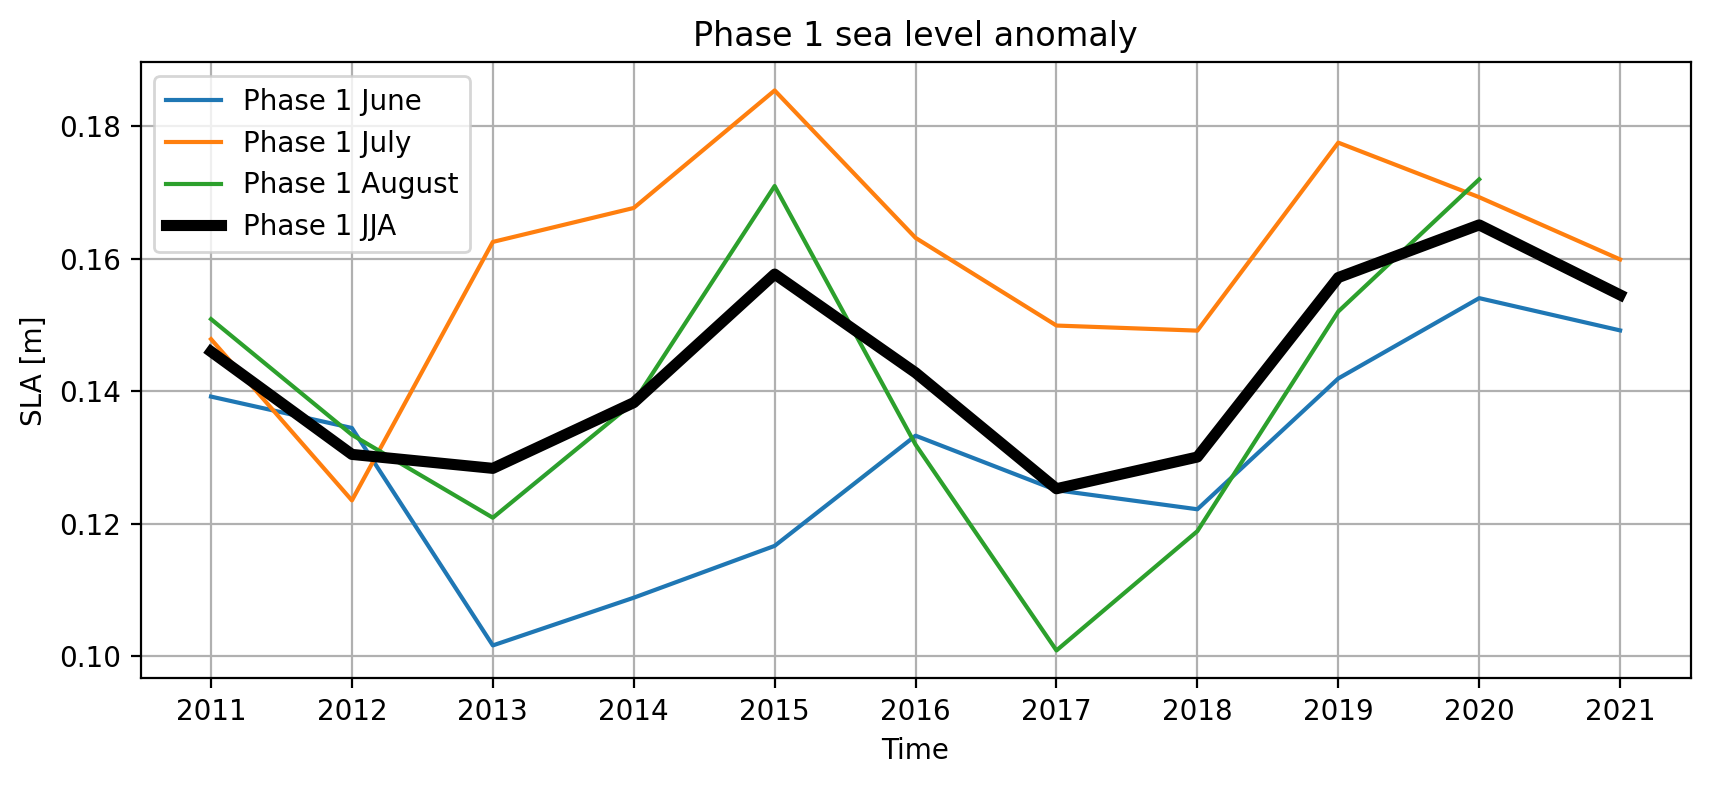

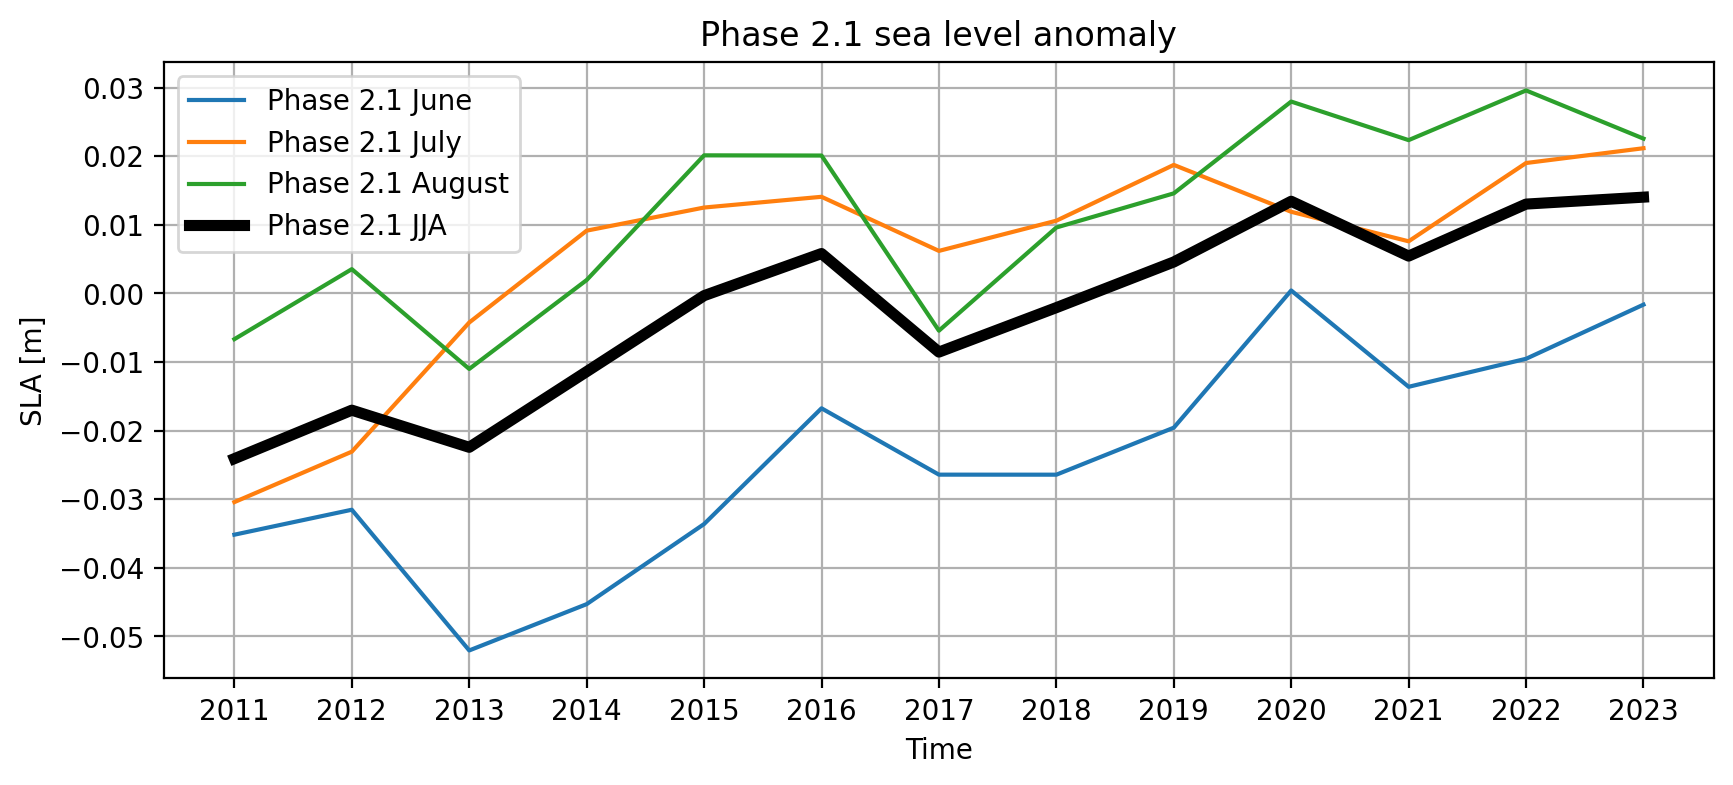

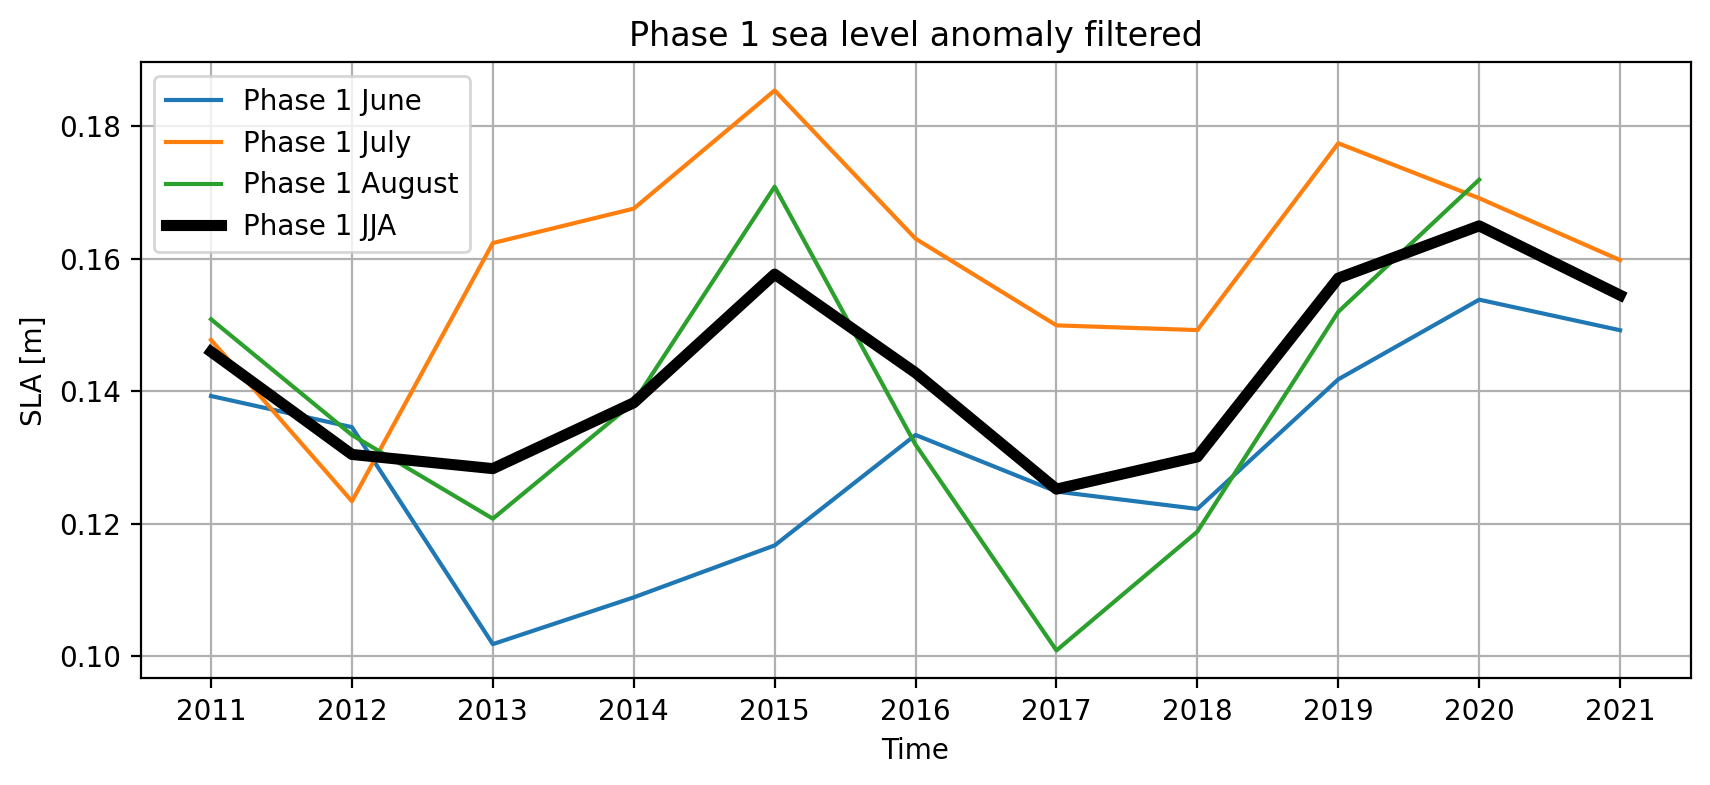

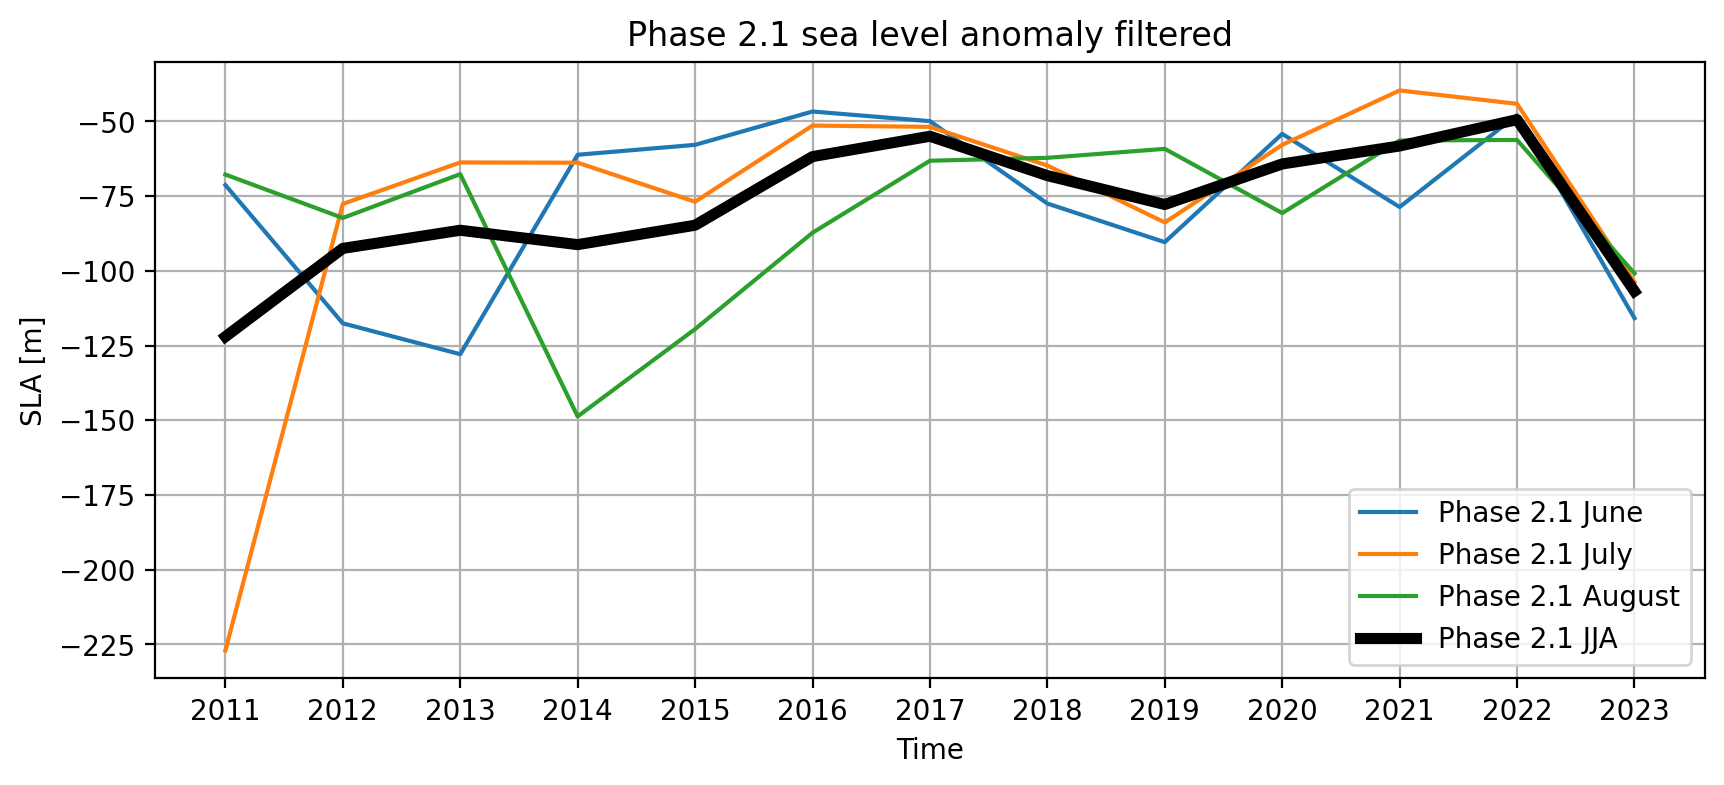

In [63]:
for idx, data_type in enumerate(data_types):
    plt.figure(figsize=(10,4), dpi=200)
    for data1, data2, month in zip(data_phase1, data_phase2, months):
        plt.plot(years1, data1[data_type], label=f"Phase 1 {month}")
    plt.plot(years1, JJA_average1[idx], label="Phase 1 JJA", c="k", linewidth=4)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("SLA [m]")
    plt.grid()
    plt.title(f"Phase 1 {data_type.replace('_', ' ')}")
    plt.savefig(f"figures/discrepancy_investigation/phase1_cryotempo_average_{data_type}.png")
    plt.show()


    plt.figure(figsize=(10,4), dpi=200)
    for data1, data2, month in zip(data_phase1, data_phase2, months):
        if data_type == "sea_level_anomaly_filtered":
            plt.plot(years2, data2[data_type], label=f"Phase 2.1 {month}")
        else:
            plt.plot(years2, data2[data_type], label=f"Phase 2.1 {month}")
    plt.plot(years2, JJA_average2[idx], label="Phase 2.1 JJA", c="k", linewidth=4)
    plt.legend()
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("SLA [m]")
    plt.title(f"Phase 2.1 {data_type.replace('_', ' ')}")
    plt.savefig(f"figures/discrepancy_investigation/phase2_cryotempo_average_{data_type}.png")
    plt.show()
